Date                 0
Location             0
MinTemp           1086
MaxTemp            907
Rainfall          2391
Evaporation      45506
Sunlight         50660
WindGustDir       7441
WindGustSpeed     7395
WindDir-9AM       7665
WindDir-3PM       3048
WindSpeed-9AM     1281
WindSpeed-3PM     2192
Humidity-9AM      1907
Humidity-3PM      3225
Pressure-9AM     10881
Pressure-3PM     10857
Cloud-9AM        40509
Cloud-3PM        43019
Temp-9AM          1274
Temp-3PM          2585
RainToday         2391
RainTomorrow      2401
dtype: int64


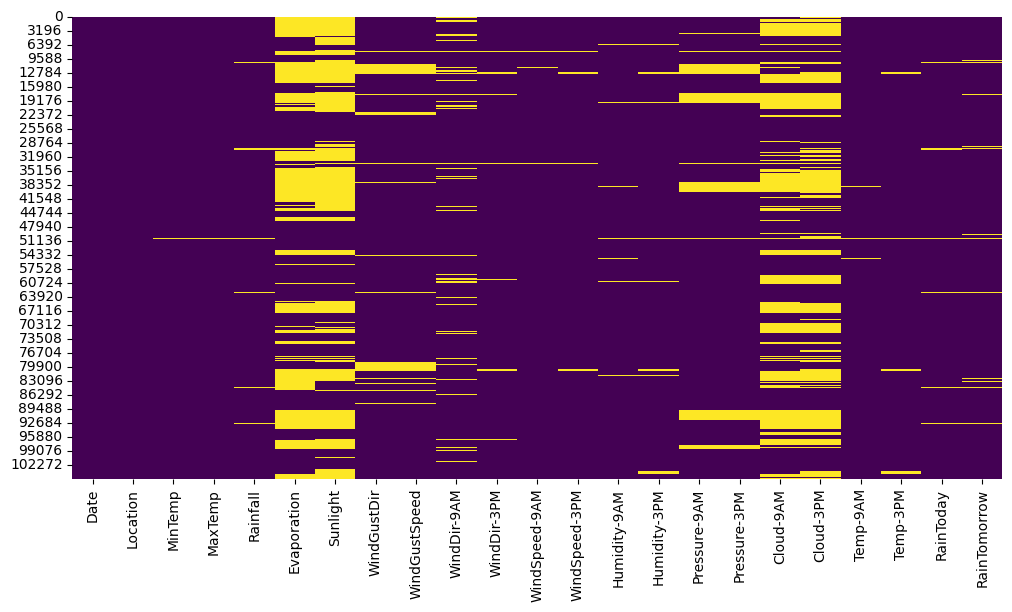

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("weather.csv")

print(df.isnull().sum())

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

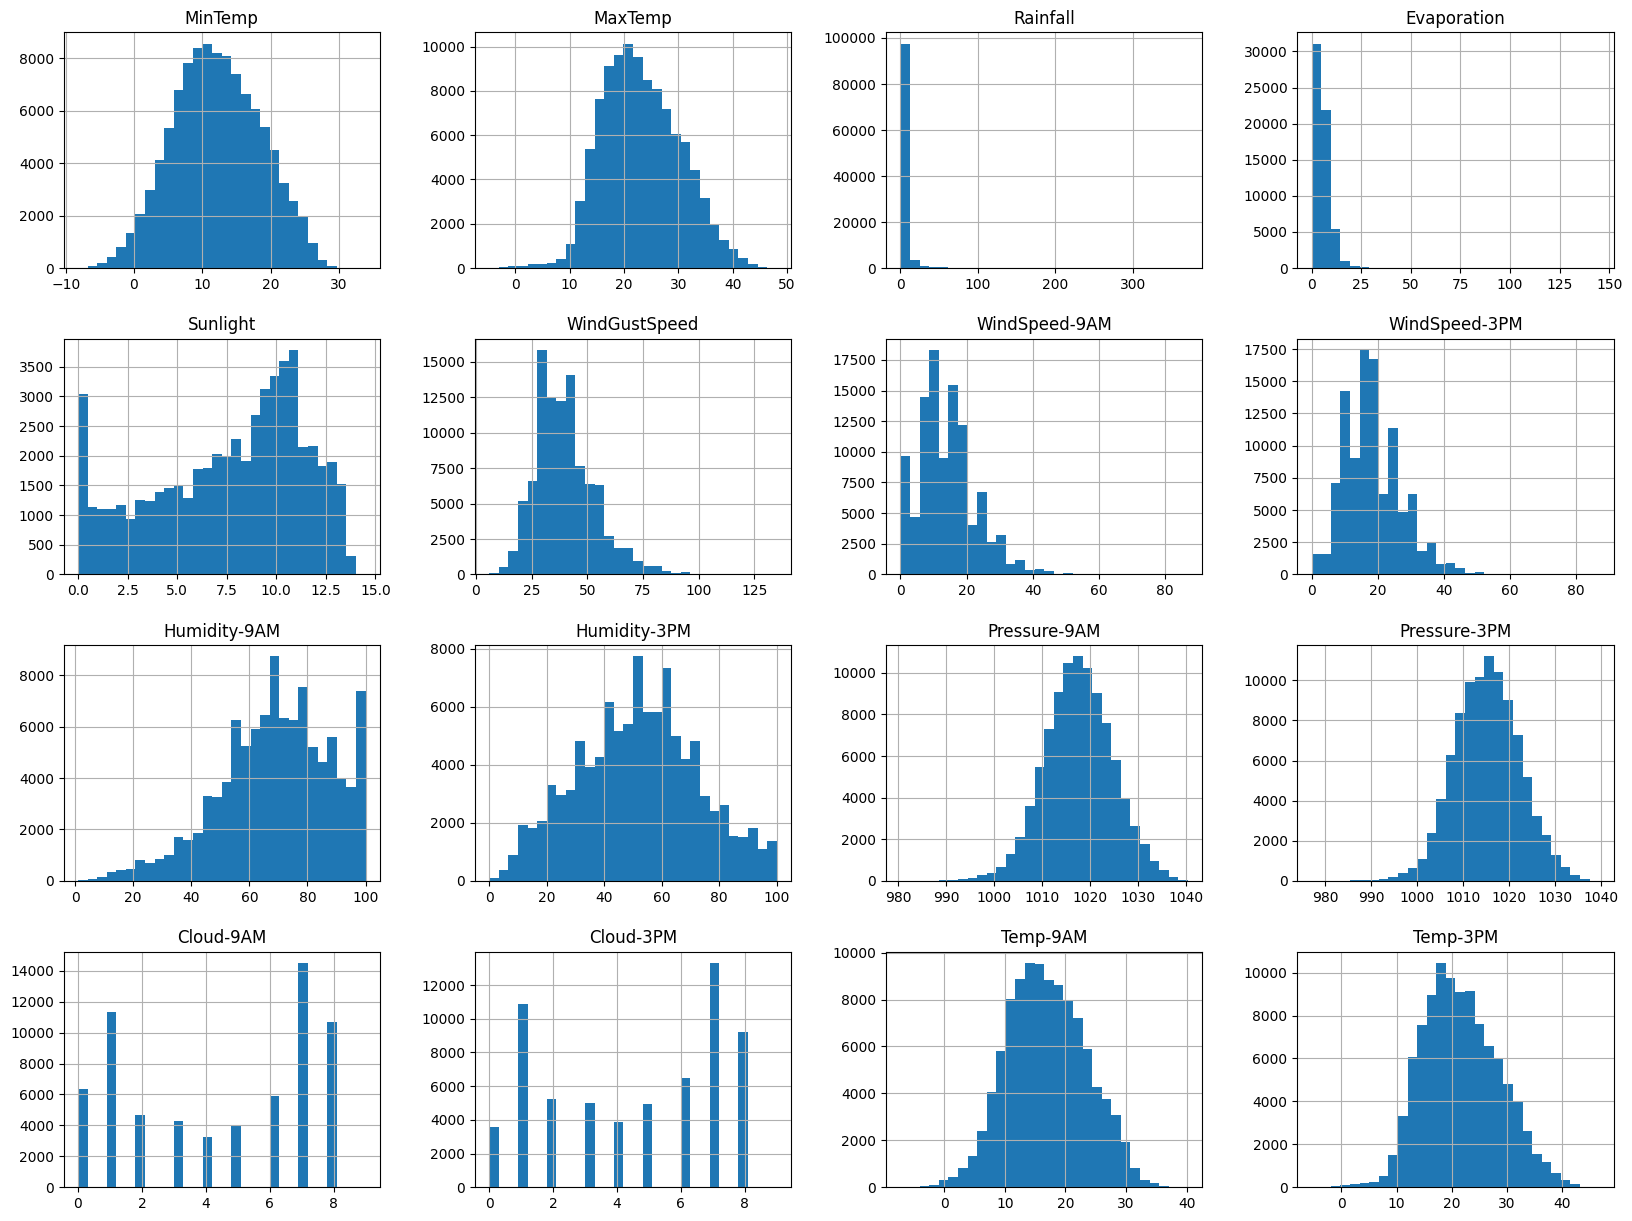

In [ ]:
df.hist(bins=30, figsize=(20,15))
plt.show()

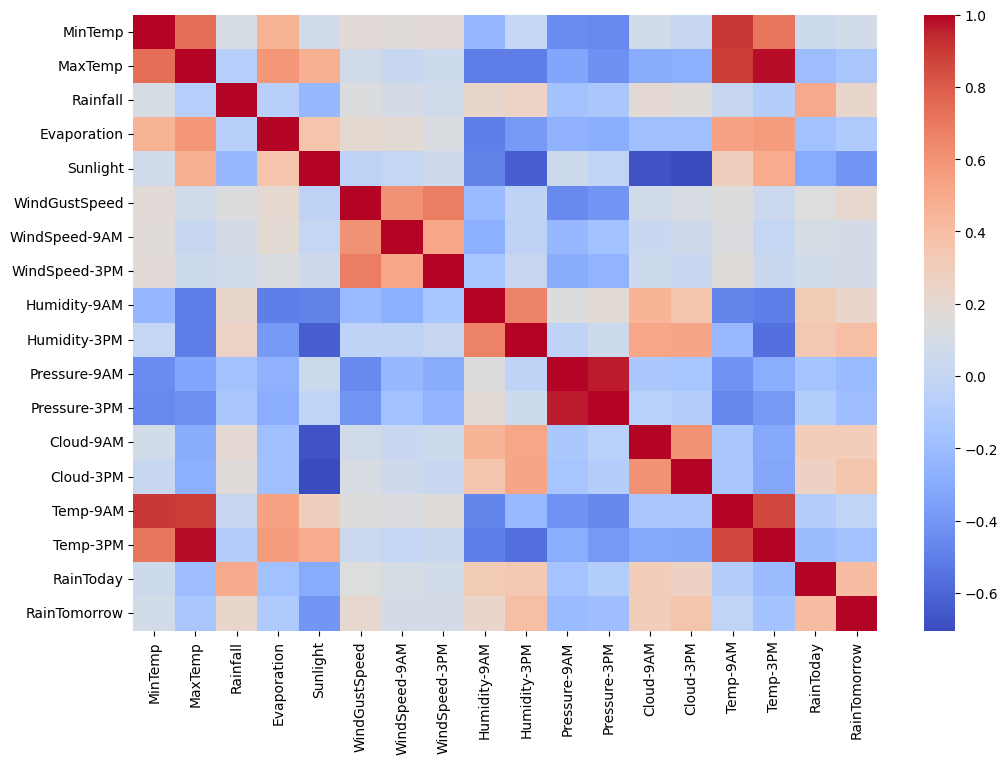

Featue-Target Correlation:
RainTomorrow     1.000000
RainToday        0.405518
Humidity-3PM     0.397466
Cloud-3PM        0.358627
Cloud-9AM        0.302445
Humidity-9AM     0.229423
Rainfall         0.224437
WindGustSpeed    0.213882
WindSpeed-9AM    0.094477
WindSpeed-3PM    0.082560
MinTemp          0.076557
Temp-9AM        -0.020740
Evaporation     -0.107485
MaxTemp         -0.143068
Temp-3PM        -0.169906
Pressure-3PM    -0.195388
Pressure-9AM    -0.213496
Sunlight        -0.402891
Name: RainTomorrow, dtype: float64


In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"].astype(str))

# Now you can run correlation
corr = df.corr(numeric_only=True)
print("Featue-Target Correlation:")
print(corr["RainTomorrow"].sort_values(ascending=False))


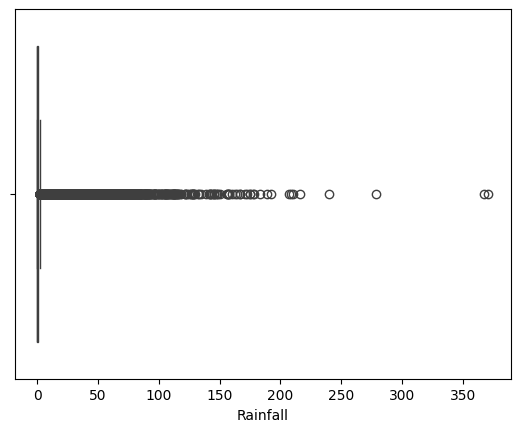

In [ ]:
sns.boxplot(x=df["Rainfall"])
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example with LabelEncoder
le = LabelEncoder()
df["RainToday"] = le.fit_transform(df["RainToday"].astype(str))



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
missing_percent = df.isnull().mean() * 100

# Show all columns with more than 40% missing
print("missing value percentage:")
print(missing_percent[missing_percent > 40])

missing value percentage:
Evaporation    43.150009
Sunlight       48.037170
Cloud-3PM      40.791769
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataframe
df = pd.read_csv("weather.csv")

# Handle categorical features
le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"].astype(str))
df["RainToday"] = le.fit_transform(df["RainToday"].astype(str))

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness before scaling
skewness_before = df[numeric_cols].skew().sort_values(ascending=False)
print("Skewness before scaling:\n", skewness_before)

# Scale the numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Calculate skewness after scaling
skewness_after = df[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewness after scaling:\n", skewness_after)


Skewness before scaling:
 Rainfall         9.894032
Evaporation      4.094991
RainToday        1.631211
RainTomorrow     1.628499
WindGustSpeed    0.868268
WindSpeed-9AM    0.763245
WindSpeed-3PM    0.613051
Temp-3PM         0.240546
MaxTemp          0.222494
Temp-9AM         0.089301
Humidity-3PM     0.031808
MinTemp          0.022860
Pressure-3PM    -0.037090
Pressure-9AM    -0.091342
Cloud-9AM       -0.229106
Cloud-3PM       -0.230816
Humidity-9AM    -0.485208
Sunlight        -0.491356
dtype: float64

Skewness after scaling:
 Rainfall         9.894032
Evaporation      4.094991
RainToday        1.631211
RainTomorrow     1.628499
WindGustSpeed    0.868268
WindSpeed-9AM    0.763245
WindSpeed-3PM    0.613051
Temp-3PM         0.240546
MaxTemp          0.222494
Temp-9AM         0.089301
Humidity-3PM     0.031808
MinTemp          0.022860
Pressure-3PM    -0.037090
Pressure-9AM    -0.091342
Cloud-9AM       -0.229106
Cloud-3PM       -0.230816
Humidity-9AM    -0.485208
Sunlight        -0.4913